# Identify tumor regions on Slide-tags data.



In this tutorial, we foucs on the Slide-tags human melanoma data. The raw data and processed data are available at [Google Drive](https://drive.google.com/drive/folders/1rAAbJcpMbXLz8eqNsPCE90pa9DpdijjH?usp=sharing). 

In [1]:

import scanpy as sc
import matplotlib.pyplot as plt
import MultiGATE 

Instructions for updating:
non-resource variables are not supported in the long term


## Preparation

/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


------Calculating spatial graph...
The graph contains 14994 edges, 2535 cells.
5.9148 neighbors per cell on average.
------Calculating spatial graph...
The graph contains 14994 edges, 2535 cells.
5.9148 neighbors per cell on average.


/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/MultiGATE/utils.py:192: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  rna.var['chrom'] = gene_df.loc[rna.var_names, 'chrom']
/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/MultiGATE/utils.py:209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  atac.var[['chrom', 'chromStart', 'chromEnd']] = chrom_info
/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/MultiGATE/utils.py:231: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  dist = biadjacency_matrix(dist_graph, genes.index, peaks.index, weight="dist", dtype=np.float32).tocoo()
/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/anndat

The graph contains 8200 edges, 1828 genes.
4.4858 peaks per gene on average.


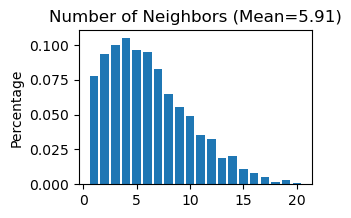

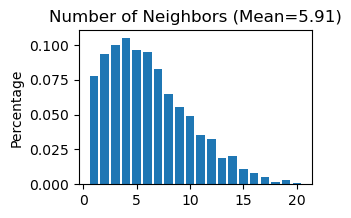

In [2]:

base_path = './output/'


file_name= "../data_tutorial/slide_tags/HumanMelanoma_RNA.h5ad" #RNA
adata1 = sc.read_h5ad(file_name)
adata1.obsm["spatial"] = adata1.obsm["spatial"]*(-1)
MultiGATE.Cal_Spatial_Net(adata1, rad_cutoff=100) 
MultiGATE.Stats_Spatial_Net(adata1)



file_name= "../data_tutorial/slide_tags/HumanMelanoma_ATAC_lsi.h5ad" #ATAC  
adata2 = sc.read_h5ad(file_name)
adata2.obsm["spatial"] = adata2.obsm["spatial"]*(-1)
MultiGATE.Cal_Spatial_Net(adata2, rad_cutoff=100)
MultiGATE.Stats_Spatial_Net(adata2)

adata1 = adata1[:, adata1.var['highly_variable']]
adata2 = adata2[:, adata2.var['highly_variable']]

MultiGATE.Cal_gene_peak_Net_new(adata1, adata2, 150000,file = '../data_tutorial/human/gencode.v25.chr_patch_hapl_scaff.annotation.gtf.gz')
adata1.uns['gene_peak_Net'] = adata2.uns['gene_peak_Net']


## Running MultiGATE

In [3]:
num_epoch = 3000 
adata1, adata2 = MultiGATE.train_MultiGATE(adata1, adata2, bp_width = 400,n_epochs=num_epoch,save_attention=True) 

Instructions for updating:
dim is deprecated, use axis instead
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2024-04-16 12:58:24.964499: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2024-04-16 12:58:24.974883: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3100000000 Hz
2024-04-16 12:58:24.975624: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c04c547f40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2024-04-16 12:58:24.975659: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2024-04-16 12:58:24.979732: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2024-04-16 12:58:25.253908: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55c04c5b05b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-16 12:58:25.253950: I tensorflow/compil

## Clustering

In [4]:
size = 10
resolution =  0.1 
sc.pp.neighbors(adata1, use_rep='MultiGATE_clip_all',key_added = 'avg') 
sc.tl.louvain(adata1, resolution=resolution,neighbors_key = 'avg')

/stat_Lin_Group/s1155202250/basic/conda/envs/MultiGATEinstalltest0416/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Plotting the results

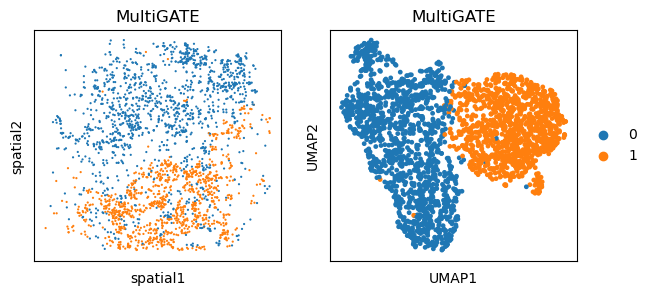

: 

In [5]:

plt.rcParams["figure.figsize"] = (7, 3) 
fig, axs = plt.subplots(1, 2)
sc.tl.umap(adata1,neighbors_key = 'avg',)
sc.pl.embedding(adata1, basis="spatial", color="louvain",s=size, show=False, title='MultiGATE',ax=axs[0],legend_loc=None)
sc.pl.umap(adata1, color="louvain",title='MultiGATE',ax=axs[1])
